In [1]:
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

In [2]:
with open('second-pickle.pickle', 'rb') as f:
     df1,df2,df3 = pickle.load(f)

In [3]:
df1

['I-30 E',
 'I-35E S',
 'Warren Pkwy',
 'I-820 E',
 'Sutter St',
 'US-67 S',
 'I-20 W',
 'University Dr',
 'US-75 N',
 'Dallas North Tollway N',
 'FM 423',
 'Exit 29: President George Bush Tpk N',
 'I-35W N',
 'Exit 18: Oakland Blvd',
 'US-75 S',
 'SH-183 W',
 'I-635 W',
 'SH-360 S',
 'I-20 E',
 'to I-635 E',
 'N Henderson Ave',
 'I-35E N',
 'US-80 W',
 'US-287 S',
 'I-30 W',
 'Cimarron Trl',
 'Loop 12 S',
 'I-635 E',
 'Cupertino Trl',
 'W Northwest Hwy',
 'Elm St',
 'North Texas Blvd',
 'Eldorado Pkwy',
 'Circle Ln',
 'N Stemmons Fwy',
 nan,
 'Coit Rd',
 'Continental Ave',
 'I-35 N',
 'Meadowview Dr',
 'Sunrise Dr',
 'W Hebron Pkwy',
 'Young St',
 'Allen St',
 'Rendon New Hope Rd',
 'US-80 E',
 'W Lawther Dr',
 'Morton St',
 'Exit 54A: SH-183 / NE 28th St E',
 'W Rosedale St',
 'Willis Ave',
 'Lamar St',
 'Forest Park Blvd',
 'to Montfort Dr',
 'French Wood Dr',
 'E Trinity Mills Rd',
 'E Pioneer Pkwy',
 'to US-75 S',
 'SH-114',
 'to Oakmont Blvd',
 'Dowdy Ferry Rd',
 'E Belt Line Rd'

In [4]:
with open('Waze-Data-Sequences.pickle', 'rb') as f:
  event_list, df = pickle.load(f)

In [5]:
df

,label,events
0,1,"[object on roadway, stopped car on the shoulde..."
1,1,"[stopped traffic, small traffic jam, heavy tra..."
2,1,[slowdown]
3,1,"[heavy traffic, traffic jam]"
4,1,"[traffic heavier than normal, heavy traffic, h..."
...,...,...
3277,0,"[traffic jam, stopped traffic, heavy traffic, ..."
3278,0,"[large traffic jam, slowdown]"
3279,0,"[major event, accident]"
3280,0,"[major event, heavy traffic, stopped car on th..."


In [6]:
len(df3[df3['EVENT_TYPE'].isin(['accident','minor accident'])])

49766

In [7]:
df3[(df3['EVENT_TYPE'].isin(["accident","minor accident"]))].FACILITY_NAME.unique()

array(['11th Ave', '14th St', '15th Ave', ..., 'to Windhaven Pkwy',
       'to Wycliff Ave', 'to Zang Blvd N'], dtype=object)

In [8]:
len(list(df3[(df3['EVENT_TYPE'].isin(["accident","minor accident"]))].FACILITY_NAME.unique()))

4131

In [9]:
sq=[]
for road in df1:
    fuse1=df3[df3['FACILITY_NAME'] == road]
    time=[]
    time=list(fuse1[(fuse1['EVENT_TYPE'].isin(["accident","minor accident"]))].time)
    for item in time:
        stim= item -timedelta(minutes=30)
        maske = ((fuse1['time'] >= stim) & (fuse1['time'] <= item))
        dfse=fuse1.loc[maske]
        dfse=dfse.reset_index(drop=True)
        s1=[]
        for i in range(len(dfse)-1):
            s1.append(dfse['EVENT_TYPE'].loc[i])
        sq.append(s1)

In [10]:
accident = []

for sequence in sq:
    if len(sequence) != 0:
        accident.append(sequence)

In [11]:
dfna = df3[(df3['EVENT_TYPE'] != 'accident') & (df3['EVENT_TYPE'] != 'minor accident')].sample(n=40000, random_state=12)
seqsna=[]
etimena=[]
for ix in range(len(dfna)):
    road=dfna['FACILITY_NAME'].iloc[ix]
    dfuse1na=df3[df3['FACILITY_NAME'] == road]
    etimena=dfna['time'].iloc[ix]
    stimena= etimena -timedelta(minutes=30)
    maskna = ((dfuse1na['time'] >= stimena) & (dfuse1na['time'] <= etimena))
    dfusena=dfuse1na.loc[maskna]
    dfusena=dfusena.reset_index(drop=True)
    seq1na=[]
    for i in range(len(dfusena)-1):
        seq1na.append(dfusena['EVENT_TYPE'].loc[i])
    seqsna.append(seq1na)

In [12]:
not_accident = []

for sequence in seqsna:
    if len(sequence) != 0:
        not_accident.append(sequence)

In [37]:
dtemp1=pd.DataFrame({'label':1, 'events': accident})
dtemp2 = pd.DataFrame({'label':0, 'events': not_accident})
dtemp1=dtemp1.sample(n=len(dtemp2), random_state=12)
fdf=pd.concat([dtemp1, dtemp2])
fdf.reset_index(inplace=True,drop=True)

In [38]:
with open('Waze-Data-Sequences.pickle', 'wb') as f:
    pickle.dump( (fdf ), f)

In [41]:
event_dict={}
for i in range(len(df2)):
    event_dict.update({ i+1 : df2[i]})
event_dict

{1: 'minor accident',
 2: 'other',
 3: 'road closed',
 4: 'stopped car on the shoulder',
 5: 'traffic jam',
 6: 'major event',
 7: 'pothole',
 8: 'missing sign on the shoulder',
 9: 'stopped car',
 10: 'hazard on the shoulder',
 11: 'accident',
 12: 'flooding',
 13: 'road construction',
 14: 'stopped traffic',
 15: 'object on roadway',
 16: 'animal struck',
 17: 'heavy traffic',
 18: 'small traffic jam',
 19: 'slowdown',
 20: 'animal on the shoulder',
 21: 'large traffic jam',
 22: 'traffic heavier than normal',
 23: 'malfunctioning traffic light',
 24: 'medium traffic jam',
 25: 'hazard on road',
 26: 'weather hazard',
 27: 'road closed due to construction',
 28: 'hail',
 29: 'ice on roadway',
 30: 'fog',
 31: 'huge traffic jam',
 32: 'road closed due to hazard'}

In [42]:
len(dtemp2)

30363

In [43]:
len(dtemp1)

30363

In [71]:
max_len_event_id = fdf.events.apply(len).idxmax()
max_len_event = fdf.iloc[max_len_event_id]
maxlen = len(max_len_event.events)

In [72]:
reversed_dict = {}
for k, v in event_list.items():
  reversed_dict[v] = k

In [73]:
def event_list_to_index(event_list):
  list_idxs = []
  for event in (event_list):
    idx = reversed_dict[event]
    list_idxs.append(idx)
  return list_idxs

In [74]:
from keras.preprocessing.sequence import pad_sequences
fdf.events.apply(event_list_to_index)

0                                   [4, 5, 22, 14, 17, 17]
1                                                      [4]
2        [17, 5, 5, 14, 4, 14, 5, 5, 17, 17, 14, 17, 17...
3                                                      [5]
4                                                      [1]
                               ...                        
60721                                       [19, 5, 5, 14]
60722                                            [5, 5, 5]
60723    [22, 17, 5, 17, 4, 17, 17, 17, 17, 17, 17, 5, ...
60724                                      [5, 5, 5, 5, 5]
60725                                                  [5]
Name: events, Length: 60726, dtype: object

In [78]:
sequences = fdf.events.apply(event_list_to_index).tolist()
data = pad_sequences(sequences, maxlen=maxlen)
labels = np.array(fdf.label)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [81]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [82]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [83]:
num_events = len(event_list) + 1
embedding_dim = 20
embedding_matrix = np.random.rand(num_events, embedding_dim)

In [87]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(num_events, embedding_dim))
model.add(LSTM(units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))


model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_valid, y_valid))
model.save("model1_with_dropoutandrecurr0.5.h5")

Epoch 1/50
95/95 [==============================] - 61s 626ms/step - loss: 0.6307 - acc: 0.6475 - val_loss: 0.5702 - val_acc: 0.6960
Epoch 2/50
95/95 [==============================] - 55s 583ms/step - loss: 0.5722 - acc: 0.6888 - val_loss: 0.5472 - val_acc: 0.7017
Epoch 3/50
95/95 [==============================] - 56s 587ms/step - loss: 0.5556 - acc: 0.6937 - val_loss: 0.5406 - val_acc: 0.7104
Epoch 4/50
95/95 [==============================] - 56s 591ms/step - loss: 0.5450 - acc: 0.7037 - val_loss: 0.5356 - val_acc: 0.7124
Epoch 5/50
95/95 [==============================] - 57s 601ms/step - loss: 0.5402 - acc: 0.7026 - val_loss: 0.5339 - val_acc: 0.7123
Epoch 6/50
95/95 [==============================] - 57s 603ms/step - loss: 0.5379 - acc: 0.7079 - val_loss: 0.5322 - val_acc: 0.7149
Epoch 7/50
95/95 [==============================] - 57s 596ms/step - loss: 0.5344 - acc: 0.7113 - val_loss: 0.5298 - val_acc: 0.7196
Epoch 8/50
95/95 [==============================] - 57s 601ms/step - 

C:\Users\ahmed\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


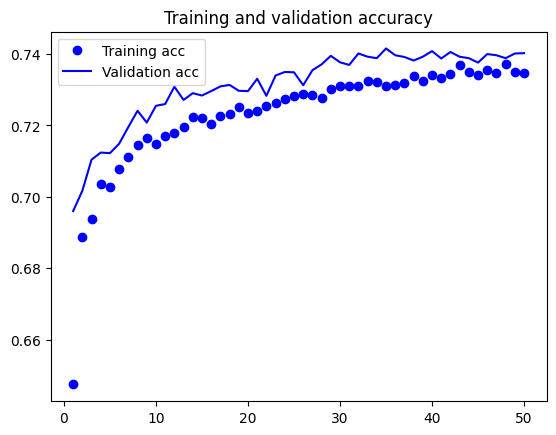

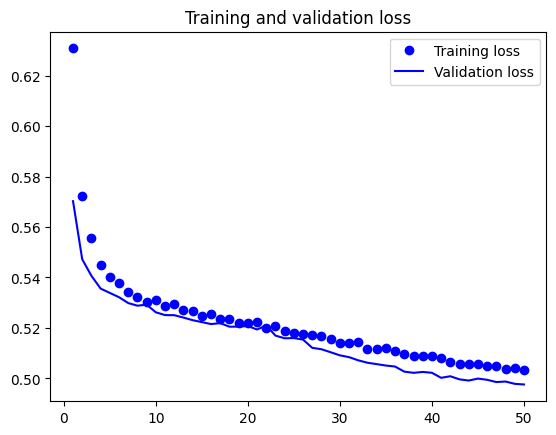

In [88]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

[array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0, 

In [113]:
from keras.models import load_model
model = load_model("model1_with_dropoutandrecurr0.5.h5")
predictions = model.predict(data[454:455])

1/1 [==============================] - 0s 175ms/step


In [114]:
predictions

array([[0.73373914]], dtype=float32)

In [112]:
data[454:455]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 